<a href="https://colab.research.google.com/github/autheblanc/skills-introduction-to-github/blob/main/1201_prediction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import h5py
with h5py.File('/content/1201_prediction_analysis.h5', 'r') as f:
    occupancy_matrix = f['track_occupancy'][:]
    tracks_matrix = f['tracks'][:]

print(occupancy_matrix.shape)
print(tracks_matrix.shape)

(293, 1)
(1, 2, 3, 293)


In [3]:
with h5py.File( '/content/1201_prediction_analysis.h5', 'r') as f:
    dset_names = list(f.keys())
    locations = f["tracks"][:].T
    node_names = [n.decode() for n in f["node_names"][:]]

print("===filename===")
print('/content/1201_prediction_analysis.h5')
print()

print("===HDF5 datasets===")
print(dset_names)
print()

print("===locations data shape===")
print(locations.shape)
print()

print("===nodes===")
for i, name in enumerate(node_names):
    print(f"{i}: {name}")
print()

===filename===
/content/1201_prediction_analysis.h5

===HDF5 datasets===
['edge_inds', 'edge_names', 'instance_scores', 'labels_path', 'node_names', 'point_scores', 'provenance', 'track_names', 'track_occupancy', 'tracking_scores', 'tracks', 'video_ind', 'video_path']

===locations data shape===
(293, 3, 2, 1)

===nodes===
0: snout
1: eye
2: ear



In [4]:
frame_count, node_count, _, instance_count = locations.shape

print("frame count:", frame_count)
print("node count:", node_count)
print("instance count:", instance_count)

frame count: 293
node count: 3
instance count: 1


In [5]:
!pip uninstall -qqq -y opencv-python opencv-contrib-python
!pip install -qqq "sleap[pypi]>=1.3.3"


In [6]:
!ls -lah

total 62M
drwxr-xr-x 1 root root 4.0K Dec  5 18:45 .
drwxr-xr-x 1 root root 4.0K Dec  5 17:08 ..
-rw-r--r-- 1 root root  26K Dec  5 17:11 1201_prediction_analysis.h5
-rw-r--r-- 1 root root  59M Dec  5 17:11 241125_012328.single_instance.zip
drwxr-xr-x 4 root root 4.0K Dec  3 19:31 .config
-rw-r--r-- 1 root root 1.4M Dec  5 17:10 EC01_results_2024-11-08T10_20_2_Trial_23.avi
-rw-r--r-- 1 root root 1.8M Dec  5 18:45 EC05_results_2024-11-09T11_12_32_Trial_55.avi
drwxr-xr-x 1 root root 4.0K Dec  3 19:31 sample_data


In [8]:
import sleap

# This prevents TensorFlow from allocating all the GPU memory, which leads to issues on
# some GPUs/platforms:
sleap.disable_preallocation()

# This would hide GPUs from the TensorFlow altogether:
# sleap.use_cpu_only()

# Print some info:
sleap.versions()
sleap.system_summary()

SLEAP: 1.3.4
TensorFlow: 2.8.4
Numpy: 1.22.4
Python: 3.10.12
OS: Linux-6.1.85+-x86_64-with-glibc2.35
GPUs: None detected.


In [9]:
predictor = sleap.load_model("/content/241125_012328.single_instance.zip")

/usr/local/lib/python3.10/dist-packages/networkx/readwrite/json_graph/node_link.py:287: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


In [10]:
import numpy as np
def get_predictions(filename):

  video=sleap.load_video(filename)
  total_frames=video.num_frames
  labels = predictor.predict(video)

  return labels

get_predictions("/content/EC05_results_2024-11-09T11_12_32_Trial_55.avi")

Output()

Labels(labeled_frames=602, videos=1, skeletons=1, tracks=0)

In [14]:
labels

Output()

KeyboardInterrupt: 

In [12]:
import numpy as np
labels

pts = labels.numpy()
for i in range (total_frames):
  A=np.matrix(pts[i])
  B= A[:,0]
  print(B.transpose())
for t in range (total_frames):
  A=np.matrix(pts[t])
  C= A[:,1]
  print(C.transpose())

NameError: name 'labels' is not defined

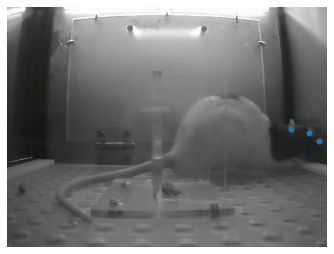

In [74]:
import random
def check_predictions(filename, frame_number):

  if frame_number == -1:
    num=random.randint(0,total_frames)
    labels[num].plot(scale=0.5)
  else:
    labels[frame_number].plot(scale=0.5)

check_predictions("/content/EC05_results_2024-11-09T11_12_32_Trial_55.avi", 500)